In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
df.shape

(1460, 81)

In [22]:
for i in df.columns:
    print(i,100*df[i].isnull().mean())


Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.73972602739726
LotArea 0.0
Street 0.0
Alley 93.76712328767123
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinSF1 0.0
BsmtFinType2 2.6027397260273974
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0684931506849315
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.2602739

In [26]:
null_columns_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","MasVnrType" ,"FireplaceQu",  "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]


In [30]:
for i in null_columns_with_meaning:
    df[i].fillna("None", inplace=True)

In [32]:
100*df.isnull().mean()

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [33]:
df.drop(['LotFrontage'], axis = 1,inplace = True)

In [34]:
df.drop(['Id'], axis = 1,inplace = True)

In [36]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

In [37]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace = True)

In [38]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [39]:
100*df.isnull().mean()

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 79, dtype: float64

In [40]:
df.shape

(1460, 79)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

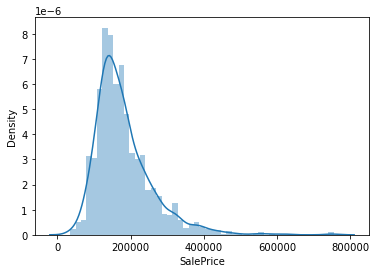

In [42]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

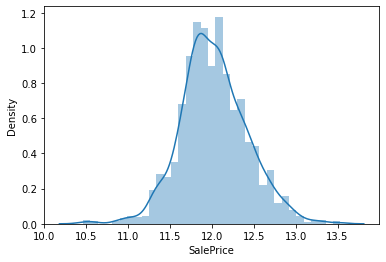

In [44]:
df['SalePrice']=np.log(df.SalePrice) 
sns.distplot(df["SalePrice"])

In [45]:
corr_matrix = df.corr().abs()

In [46]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [47]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

In [49]:
df.drop(df[['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']], axis=1, inplace = True)
df.shape

(1460, 76)

In [52]:

cont_cols =list(df.dtypes[df.dtypes != object].index)
cat_cols = list(df.dtypes[df.dtypes == object].index) 

In [54]:
corr_data = df[cont_cols].corr()
corr_data = corr_data[corr_data['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False) 
print(corr_data[1:])
corr_coef_cols = [index for index in corr_data.index]

OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
TotalBsmtSF     0.612134
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64
